# Kryptografia klasyczna (od starożytności do czasów współczesnych)
### Literatura:
1. Księga szyfrów, Simon Singh, Świat książki, 2001
2. Łamacze kodów, David Kahn, WNT, 2004

In [1]:
# Alfabet jawny i szyfrowy 

alphabet = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']  # w tym spacja

alphabet_size = len(alphabet)

## Szyfr Cezara
--------------
Szyfr Cezara oczywiście nie zawdzięcza swego istnienia Juliuszowi Cezarowi. Został przezeń jedynie wspomniany w pamiętnikach o wojnach galijskich. Prawdopodobnie była to dobrze znana metoda w tym czasie.

In [2]:
def caesar_code(alphabet, plaintext, key=15): # key to przesunięcie permutacji czyli klucz szyfrowania 
    ciphertext = ""
    for char in plaintext.lower():
        ciphertext += alphabet[(alphabet.index(char) + key) % len(alphabet)] 
    
    return ciphertext

In [3]:
def caesar_decode(alphabet, ciphertext, key=15):
    decoded_text = ""
    for char in ciphertext.lower():
        decoded_text += alphabet[(alphabet.index(char) - key) % len(alphabet)] 
    
    return decoded_text

#### Przykład

In [5]:
plaintext = "Zorro fly zealotry zipper"
print("Tekst jawny: \t\t", plaintext)

ciphertext = caesar_code(alphabet, plaintext)
print("Zaszyfrowana wiadomość: ",  ciphertext, "(spacje usunięte)")

decoded_text = caesar_decode(alphabet, ciphertext)
print("Odszyfrowana wiadomość: ",  decoded_text,  "(spacje usunięte)")

Tekst jawny: 		 Zorro fly zealotry zipper
Zaszyfrowana wiadomość:  ncffcou montp chfmonxddtf (spacje usunięte)
Odszyfrowana wiadomość:  zorro fly zealotry zipper (spacje usunięte)


## Szyfr monoalfabetyczny: 
_danemu symbolowi alfabetu jawnego odpowiada dokładnie jeden i ten sam symbol alfabetu tajnego._

### Zastanów się:
1. Czy szyfr Cezara jest łatwy do złamania? Ile prób (testów przesunięć) trzeba aby złamać szyfr Cezara?
2. Co to jest atak siłowy (__brute force__)?  
3. Zaproponuj i zaimplementuj wariant szyfru Cezara, która wymaga wykonania większej liczby prób podczas ataku?  
4. Oceń koszt ataku na ten wariant Cezara.

In [6]:
import random

def substitution_cipher_code(alphabet, shuffled_alph, plaintext):
    alphabet_size = len(alphabet)
    ciphertext = ""

    for char in plaintext.lower():
        ciphertext += shuffled_alph[(alphabet.index(char)) % alphabet_size] 
            
    return ciphertext

def substitution_cipher_decode(alphabet, shuffled_alph, ciphertext):
    alphabet_size = len(alphabet)
    decoded_text = ""

    for char in ciphertext:
        decoded_text += alphabet[(shuffled_alph.index(char)) % alphabet_size] 
            
    return decoded_text

plaintext = "Zorro fly zealotry zipper"
shuffled_alph = alphabet.copy()
random.shuffle(shuffled_alph)

ciphertext = substitution_cipher_code(alphabet, shuffled_alph, plaintext)
print(ciphertext)
decoded_text = substitution_cipher_decode(alphabet, shuffled_alph, ciphertext)
print(decoded_text)

ocffckwdskopydchfskotjjpf
zorro fly zealotry zipper


## Kryptoanaliza szyfrów monoalfabetycznych

Współcześnie kryptoanaliza szyfru Cezara jest trywialna. Można po prostu sprawdzić wszystkie 26 możliwych przesunięć. 

Szyfry monoalfabetyczne nie są także odporne na __kryptoanalizę statystyczną__. Znając rozkład częstości liter w tekstach napisanych w danym języku możemy odgadnąć przesunięcie obserwując minima i maxima w histogramach. 

W zasadzie kluczową sprawą w obu przypadkach jest znajomość języka, a w gruncie rzeczy alfabetu. 

# Problem
1. Narysuj rozkład częstości występowania liter w języku angielskim (kod rysowania histogramu poniżej)

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

def plot_distributions(alphabet, distributions, distribution_names=None):
     # distributions to lista rozkładów ale rozkład może być jeden wtedy przekazujemy [rozkład]
    df = pd.DataFrame(distributions).T
    df.index = alphabet
    df.columns = distribution_names or df.columns
    
    df.plot.bar(rot=0, figsize=(18,9))
    plt.xlabel('Alfabet')
    plt.ylabel('Częstość występowania')

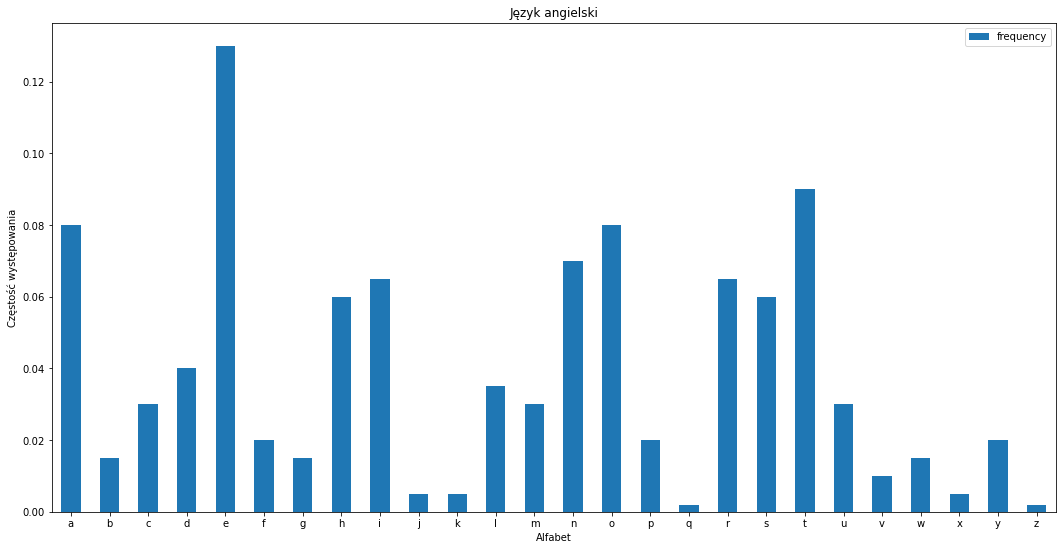

In [8]:
letters =   ['a',  'b',    'c',   'd',  'e',   'f',   'g',   'h',   'i',   'j',   'k',   'l',    'm',  'n',   'o',   'p',    'q',  'r',   's',   't',   'u',   'v',   'w',   'x',    'y',   'z']
frequency = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 0.030, 0.010, 0.015, 0.005, 0.020, 0.002]

plot_distributions(letters, [frequency], ['frequency'])
plt.title("Język angielski");

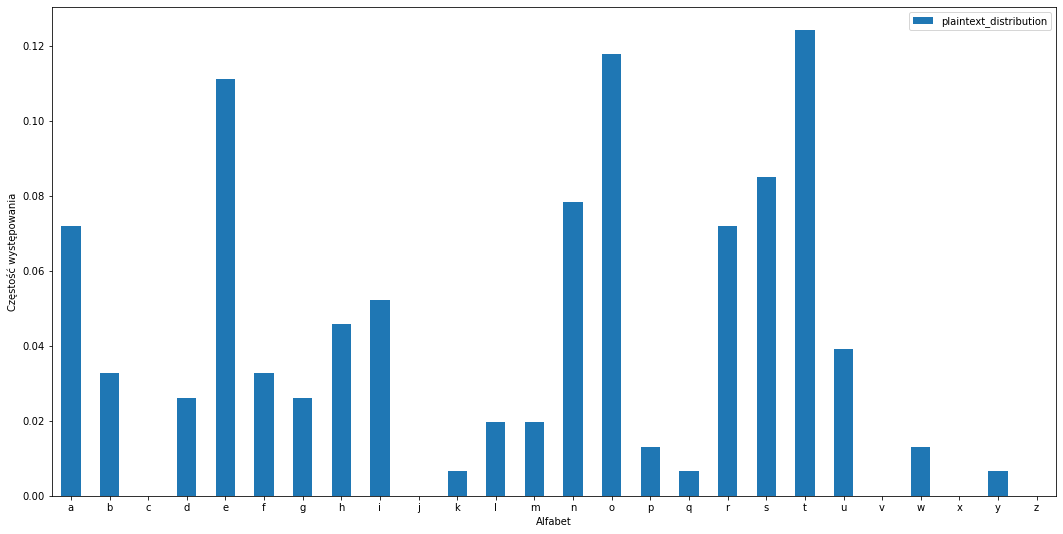

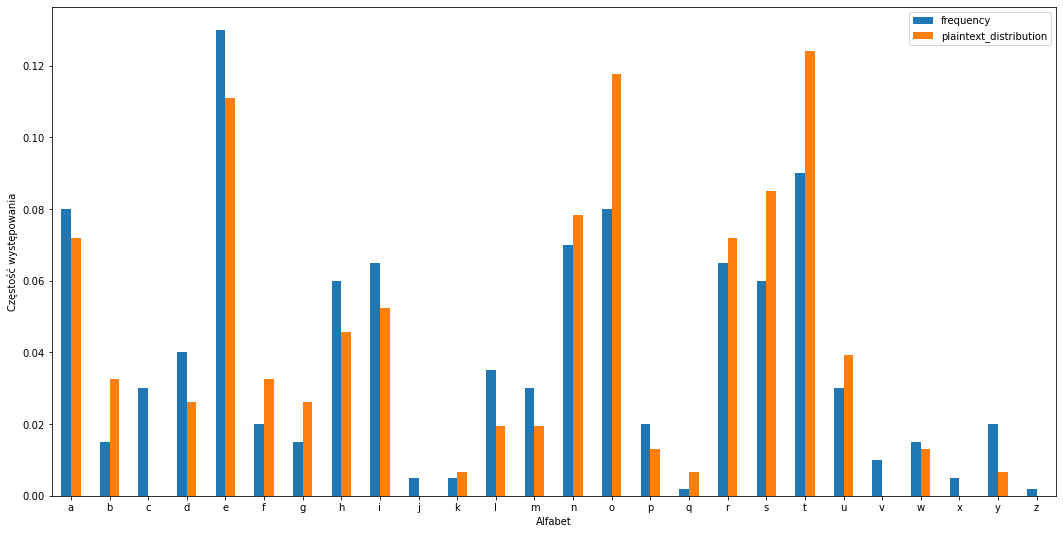

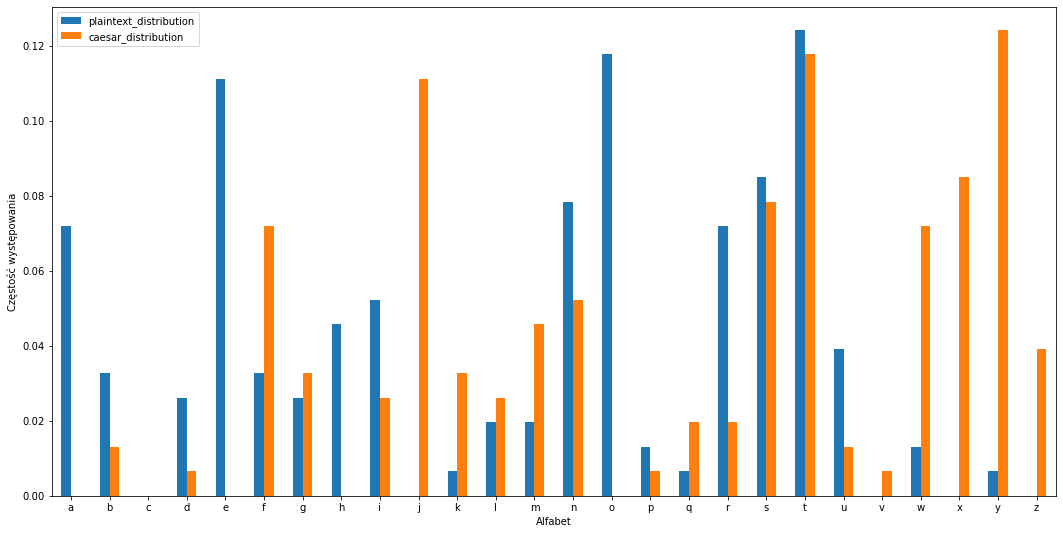

In [9]:
#  Przykład wywołania plot_distributions, wcześniej trzeba uruchomić komórki z kodowaniem i plotowaniem
plaintext = "TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsand\
ArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem"

Alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

# policz częstość i wyświetl rozkłady 
def make_distribution(alphabet, plaintext):
    value_counts = [0]*len(Alphabet)
    
    for char in plaintext:
        value_counts[alphabet.index(char.lower())] += 1

    distribution = [vc/len(plaintext) for vc in value_counts]
    
    return distribution

plaintext_distr = make_distribution(Alphabet, plaintext)
caesar_distr = make_distribution(Alphabet, caesar_code(Alphabet, plaintext, key = 5))


plot_distributions(Alphabet, [plaintext_distr], ['plaintext_distribution'])

plot_distributions(Alphabet, [frequency, plaintext_distr], ['frequency', 'plaintext_distribution'])

plot_distributions(Alphabet, [plaintext_distr, caesar_distr], ['plaintext_distribution', 'caesar_distribution'])

2. Dokonaj analizy częstości występowania liter w tekście jawnym i szyfrogramie (szyfr Cezara z dowolnym przesunięciem) dla tekstu w poniższym fragmencie kodu. Wyświetl wyniki podobnie jak powyżej. 
3. Dokonaj analizy częstości występowania liter w szyfrogramie wygenerowanym przez "ulepszonego Cezara"

### Przykład: 
Automatyczna kryptoanaliza tekst zaszyfrowanego zwykłym Cezarem

In [12]:
import nltk
nltk.download('words')
from nltk.corpus import words


def auto_cryptoanalisys(ciphertext):
    alphabet = "abcdefghijklmnopqrstuvwxyz "
    eng_letters_freq = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 0.005, 0.035, 0.030,
                        0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 0.030, 0.010, 0.015, 0.005, 0.020, 0.002, 0.000]

    valid_chars_len = len([char for char in ciphertext if char.isalpha()])  # suma wystąpień poprawnych liter w szyfrogramie
    unique_chars = list(set(filter(str.isalpha, ciphertext.lower())))  # lista unikalnych liter w szfrogramie
    frequency = [ciphertext.count(char) / valid_chars_len for char in unique_chars]  # częstość liter w tekście
    words_set = set(words.words())
    
    psi = []
    value = 0.0
    for i in range(0, 26):  # oblicz dopasowanie
        for unique_char in unique_chars:
            value += frequency[unique_chars.index(unique_char)] * eng_letters_freq[alphabet.index(unique_char) - i]
        psi.append(value)
        value = 0.0

    sorted_psi = sorted(psi, reverse=True)  # sortuj dopasowanie
    
    for i in range(0, 27):
        key = psi.index(sorted_psi[i])
        decoded_string = "".join([alphabet[alphabet.index(char) - key] for char in ciphertext]) #  odszyfruj kluczem

        print("Trying key: ", key, " ....", decoded_string)

        if ' ' not in decoded_string:  # jeśl to ciąg znaków bez spacji
            # sprawdź czy decoded_string to konkatenacja poprawnych słów angielskich
            def word_break(word):
                def _word_break(word, lookup):
                    n = len(word)
                    if n == 0:
                        return True

                    if lookup[n] == -1:
                        lookup[n] = 0
                        for i in range(1, n + 1):
                            prefix = word[:i]
                            if len(prefix) == 1 and prefix not in ['a', 'o', 'i']:
                                continue
                            if prefix in words_set and _word_break(word[i:], lookup):
                                lookup[n] = 1
                                return True

                lookup = [-1] * (len(word) + 1)
                words_set = set(words.words())
                _word_break(word, lookup)

                return lookup[-1] == 1

            if word_break(decoded_string):
                return decoded_string
        
        if all([word in words_set for word in decoded_string.split()]): # podziel wg spacji i sprawdź czy to wyrazy
            return decoded_string

    return False

# Przykład 1
ciphertext = "odggd".lower()
print(f"\nDecoded string: {auto_cryptoanalisys(ciphertext)}\n")

# Przykład 2
# exemplary_text = "This is an exemplary text. Study hard, be a good person and have fun in life"
# exemplary_text_clean = "".join([char for char in exemplary_text if char.isalpha() or char == ' ']).lower()

# exemplary_text_code = caesar_code(alphabet, exemplary_text_clean, key = 15)
# print(f"\nDecoded string: {auto_cryptoanalisys(exemplary_text_code)}\n")

exemplary_text = "This is an exemplary text. Study hard, be a good person and have fun in life"
exemplary_text_clean = "".join([char for char in exemplary_text if char.isalpha()]).lower()

exemplary_text_code = caesar_code(alphabet, exemplary_text_clean, key = 15)
print(f"\nDecoded string: {auto_cryptoanalisys(exemplary_text_code)}\n")

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Piotrek\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Trying key:  2  .... mbeeb
Trying key:  16  .... zorro

Decoded string: zorro

Trying key:  15  .... thisisanexemplarytextstudyhardbeagoodpersonandhavefuninlife

Decoded string: thisisanexemplarytextstudyhardbeagoodpersonandhavefuninlife



## Podsumowanie 
Główną słabością szyfrów monoalfabetycznych jest stałość przekształcenia, dzięki czemu możliwe jest łatwe zaobserwowanie regularności.

Rozwiązaniem może być zmiana alfabetów w trakcie szyfrowania. Dla uproszczenia wystarczy zmieniać jedynie porządek liter. 

# Problem
1. Napisać program, który zmienia alfabet szyfrowania po każdej literze.
_Co będzie potrzebne oprócz tekst jawnego?_


In [13]:
def vigenere_code(alphabet, plaintext, key):
    alphabet_size = len(alphabet)
    ciphertext = ""
    key_idx = 0
    
    for char in plaintext:
        ciphertext += alphabet[(alphabet.index(char) + key[key_idx]) % alphabet_size] 
        key_idx = (key_idx + 1) % len(key)
            
    return ciphertext

def vigenere_decode(alphabet, ciphertext, key):
    alphabet_size = len(alphabet)
    decoded_text = ""
    key_idx = 0

    for char in ciphertext:
        decoded_text += alphabet[(alphabet.index(char) - key[key_idx]) % alphabet_size] 
        key_idx = (key_idx + 1) % len(key)
            
    return decoded_text

In [14]:
plaintext = "this is an exemplary text study hard be a good person and have fun in life"

ciphertext = vigenere_code(alphabet, plaintext, [1,24,5,3,6,23,15,2,0])
print(ciphertext)

decoded_text = vigenere_decode(alphabet, ciphertext, [1,24,5,3,6,23,15,2,0])
print(decoded_text)

uenvfegbaoxj kidnasvewkthbsuriafdptdazjcgwvqoexuhxocp bkicnxjg grscojonigb
this is an exemplary text study hard be a good person and have fun in life


### Zastanów się:
1. Sprawdź jak wygląda histogram szyfrogrami. 
2. Zastanów się jakie znaczenia ma długość klucza dla bezpieczeństwa szyfrowania.
3. Czy powtarzanie klucza można wykorzystać dla potrzeb kryptoanalizy? 
4. Jaki klucz gwarantowałby bezpieczeństwo?
5. Jaki rozkład częstości symboli szyfrogramu nie ujawni żadnych przydatnych danych kryptoanalitykowi? 

### Szyfr polialfabetyczny 
_Szyfr używający wielu alfabetów szyfrowych. W trakcie szyfrowania te same litery w tekście jawnym_

### Szyfr doskonały (według Clouda Shannona):
1. Jakie warunki musi spełniać szyfr-nie-do-złamania? 

## Zadanie (dodatkowe, na ocenę)
1. Napisz notebook jupyter, które implementuje klasyczne szyfry mechaniczne: Enigma, szyfr Playfair, szyfr maszyny Lorenza. W sieci można łatwo znaleźć gotowe kody, wiec przy ocenie zwracam uwagę no dokładne omówienie kodu, przejrzystość, komentarze etc. 